## Soft Margin Classification

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

/home/qnarik/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()

In [6]:
X = iris.data[:, (2,3)]

In [10]:
y = (iris.target == 2)

In [11]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [87]:
y = y.astype('int')

In [15]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [88]:
def plot_dataset(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    grouped = df.groupby('label')

    fig, ax = plt.subplots()
    colors = ["red", "blue"]
    labels = ["x1", "x2"]
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=labels[key], color=colors[key])

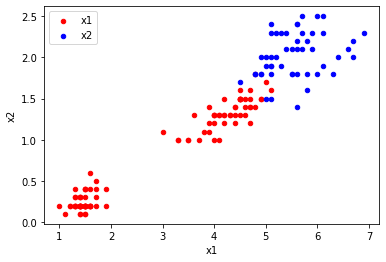

In [89]:
plot_dataset(X, y)

In [90]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [91]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [92]:
svm_clf.predict([[5.5, 1.7]])

array([1])

In [97]:
def plot_decision_boundary(X, y, pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

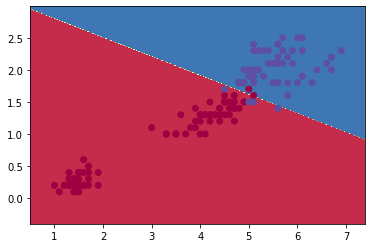

In [99]:
plot_decision_boundary(X, y, lambda x: svm_clf.predict(x))

## Nonlinear SVM Classification

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
X_n, y_n = datasets.make_moons(n_samples=100, noise=0.15)

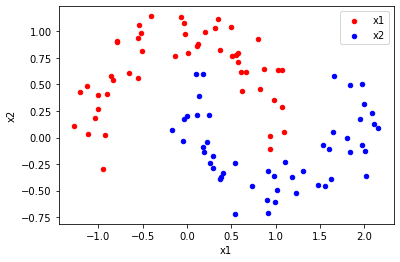

In [103]:
plot_dataset(X_n, y_n)

In [113]:
poly_svm_clf = Pipeline([
    ('polynomialFeatures', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [114]:
poly_svm_clf.fit(X_n, y_n)

Pipeline(steps=[('polynomialFeatures', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

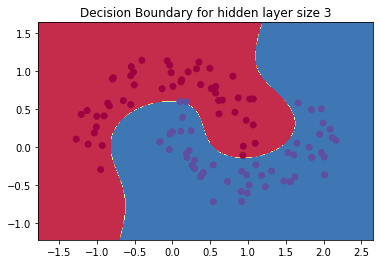

In [115]:
# Predict and plot
plot_decision_boundary(X_n, y_n, lambda x: poly_svm_clf.predict(x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

### Polynomial Kernel

In [116]:
from sklearn.svm import SVC

In [117]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('kernel_svm', SVC(C=10, kernel='poly', degree=3, coef0=1))
])

In [118]:
poly_kernel_svm_clf.fit(X_n, y_n)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kernel_svm', SVC(C=10, coef0=1, kernel='poly'))])

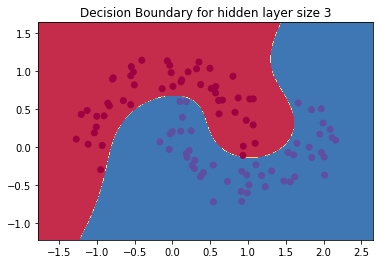

In [119]:
# Predict and plot
plot_decision_boundary(X_n, y_n, lambda x: poly_kernel_svm_clf.predict(x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

### Gaussian RBF Kernel

In [120]:
rbf_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel_svm', SVC(C=0.001, kernel='rbf', gamma=5))
])

In [121]:
rbf_kernel_clf.fit(X_n, y_n)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=5))])

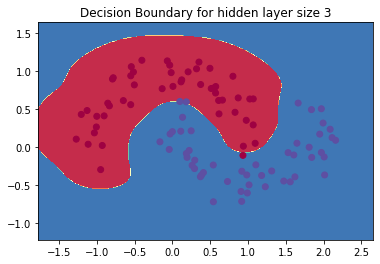

In [122]:
# Predict and plot
plot_decision_boundary(X_n, y_n, lambda x: rbf_kernel_clf.predict(x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()